# **Milestone 1**

Name: Julio Putra David

Batch: 10

_For Heroku deployment, here is the link_ https://julio-putra-ftds-010-p0m1.herokuapp.com/

---

## **Descriptive**

### **Objective**

This notebook is aimed to tets a Hypothesis about Supermarket sales gross income and see several visualizations about the dataset for the better understanding about the dataset.

### **Problem Statement**

1. Is morning sales gross income being significant from the evening sales gross income?
2. How to understand and get insight from the data easily?

---

## **Working Area**

### **I. Import Libraries**

In [23]:
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import PIL
from PIL import Image

### **II. Data Loading and Exploration**

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Taking a look at the unique values in categorical columns.

In [6]:
print('Branch           :',df['Branch'].unique())
print('City             :',df['City'].unique())
print('Customer Type    :',df['Customer type'].unique())
print('Gender           :',df['Gender'].unique())
print('Product Line     :',df['Product line'].unique())
print('Payment          :',df['Payment'].unique())

Branch           : ['A' 'C' 'B']
City             : ['Yangon' 'Naypyitaw' 'Mandalay']
Customer Type    : ['Member' 'Normal']
Gender           : ['Female' 'Male']
Product Line     : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment          : ['Ewallet' 'Cash' 'Credit card']


Seeing the purchased quantity and gross income of each Product Line in all three branches.

In [7]:
df.groupby(['City','Product line'])[['Quantity','gross income']].sum()

Quantity  gross income
City      Product line                                  
Mandalay  Electronic accessories       316      811.9735
          Fashion accessories          297      781.5865
          Food and beverages           270      724.5185
          Health and beauty            320      951.4600
          Home and lifestyle           295      835.6745
          Sports and travel            322      951.8190
Naypyitaw Electronic accessories       333      903.2845
          Fashion accessories          342     1026.6700
          Food and beverages           369     1131.7550
          Health and beauty            277      791.2060
          Home and lifestyle           245      661.6930
          Sports and travel            265      750.5680
Yangon    Electronic accessories       322      872.2435
          Fashion accessories          263      777.7385
          Food and beverages           313      817.2905
          Health and beauty            257      599.8930
          Home and lifestyle           371     1067.4855
          Sports and travel            333      922.5095

Seeing the proportion of membership and non-membership customer.

In [8]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Seeing the distribution of the gross income.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross income', ylabel='Density'>

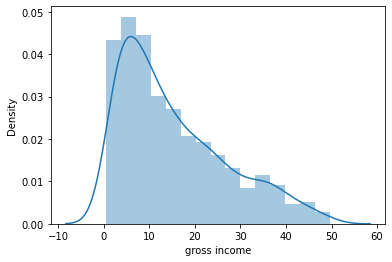

In [9]:
sns.distplot(df['gross income'])

The distribution of gross income is not normal, but positive skew. It means the mean > median > mode.

### **III. Data Pre-Processing**

#### A. Missing Value Detection and Handling

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No missing values detected.

#### B. Dropping Column

The "Branch" column will be dropped because it has the same information as the "City" column, which indicates the branch of the Supermarkets.

In [11]:
df.drop(['Branch'], axis=1, inplace=True)

#### C. Extreme Value Analysis

The hypothesis testing in this notebook will focus on "Gross Income". Thus, we will check the extreme values in the column.

First thing first we will plot the values in the column into Boxplot.

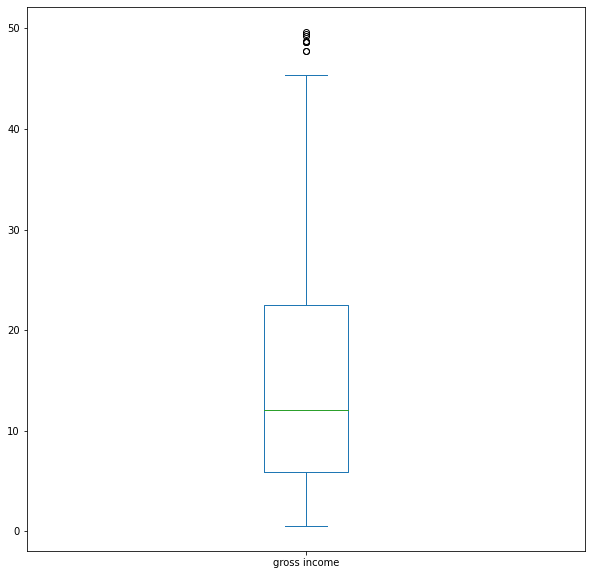

In [12]:
df['gross income'].plot(kind='box', figsize=(10, 10))
plt.show()

Based on the boxplot above, there are several outliers in the column.

Then we will calculate the **First Quartile (Q1)**, **Third Quartile (Q3)**, and **Interquartile Range (IQR)**.

In [13]:
Q3 = df['gross income'].quantile(0.75)
Q1 = df['gross income'].quantile(0.25)
IQR = Q3-Q1
print('Q3 =', Q3)
print('Q1 =', Q1)
print('IQR =', IQR)

Q3 = 22.44525
Q1 = 5.924875
IQR = 16.520375


Now we will determine the **Upper Boundary** and **Lower Boundary** to detect the outliers.

In [14]:
upper_bound = Q3+(IQR*1.5)
lower_bound = Q1-(IQR*1.5)
print('Upper boundary =', upper_bound)
print('Lower boundary =', lower_bound)

Upper boundary = 47.2258125
Lower boundary = -18.855687500000002


In [15]:
np.sum(df['gross income'] > upper_bound)

9

In [16]:
np.sum(df['gross income'] < lower_bound)

0

There are 9 outliers above the Upper Boundary and there are no outliers below the Lower Boundary.

Then, we will make a new variable for the cleaned data.

In [17]:
df_new = df.drop(np.where(df['gross income'] >= (Q3+1.5*IQR))[0])

Save df_new into csv for streamlit work.

In [18]:
df_new.to_csv('supermarket_sales_cleaned.csv', index=False)

### **IV. Hypothesis Testing**

Our hypothesis in this case are:

**H0: mean total purchase time morning = mean total purchase time evening**

**H1: mean total purchase time morning != mean total purchase time evening**

_Shopping hours: 10 AM - 9 PM_

First thing first, we will define two new variables to segregate the **morning sales** and **evening sales** data

In [19]:
df_morning = df_new[(df_new['Time'] <= '15:00')][['Time','gross income']].sort_values('Time')
df_morning = df_morning.set_index('Time')
df_morning

,gross income
Time,
10:00,22.4910
10:00,20.5360
10:00,3.6360
10:01,5.7450
10:01,4.0620
...,...
14:55,5.9860
14:55,24.3315
14:57,22.5880


In [20]:
df_evening = df_new[(df_new['Time'] > '15:00')][['Time','gross income']].sort_values('Time')
df_evening = df_evening.set_index('Time')
df_evening

,gross income
Time,
15:01,33.2350
15:01,27.9350
15:01,29.2830
15:02,29.9490
15:04,5.2440
...,...
20:54,8.2140
20:55,37.3000
20:57,7.0950


Then we will calculate the p-value to see whether will the H0 be rejected or not.

In [24]:
t_stat, p_val = stats.ttest_ind(df_morning, df_evening)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])

P-value: 0.5307398503069143
t-statistics: 0.6270978233948381


Now let's see the visualization.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


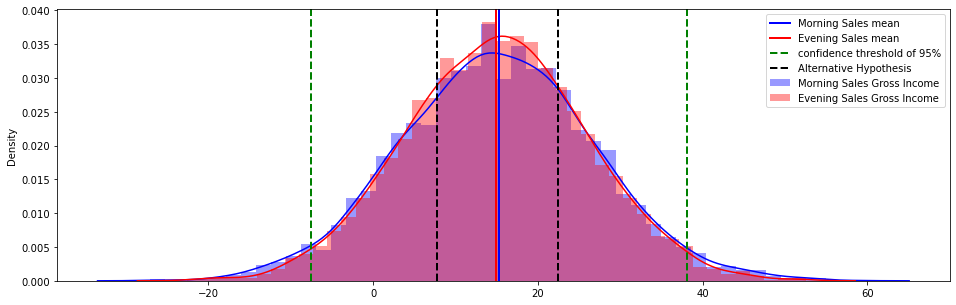

In [25]:
morning_pop = np.random.normal(df_morning['gross income'].mean(),df_morning['gross income'].std(),5000)
evening_pop = np.random.normal(df_evening['gross income'].mean(),df_evening['gross income'].std(),5000)

ci = stats.norm.interval(0.95, df_morning['gross income'].mean(), df_morning['gross income'].std())

fig_hypo = plt.figure(figsize=(16,5))
sns.distplot(morning_pop, label='Morning Sales Gross Income',color='blue')
sns.distplot(evening_pop, label='Evening Sales Gross Income',color='red')

plt.axvline(df_morning['gross income'].mean(), color='blue', linewidth=2, label='Morning Sales mean')
plt.axvline(df_evening['gross income'].mean(), color='red',  linewidth=2, label='Evening Sales mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(morning_pop.mean()+t_stat[0]*morning_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(morning_pop.mean()-t_stat[0]*morning_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.savefig('hypotest_milestone.jpg')

The p-value is more than 0.05, that means the we **fail to reject the H0**.  Therefore, it can be concluded that the morning sales gross income is not significant than the evening sales gross income. This analysis is also supported by the graph above. It can be seen from the graph that there are not many differences between the morning sales distribution and evening sales distribution.

From the analysis, we can conclude that in the morning the Supermarkets have as much gross income as in the evening.

### **V. Data Visualization**

#### **Visualization 1**: Quantity of Purchased Product Line based on Customer Type


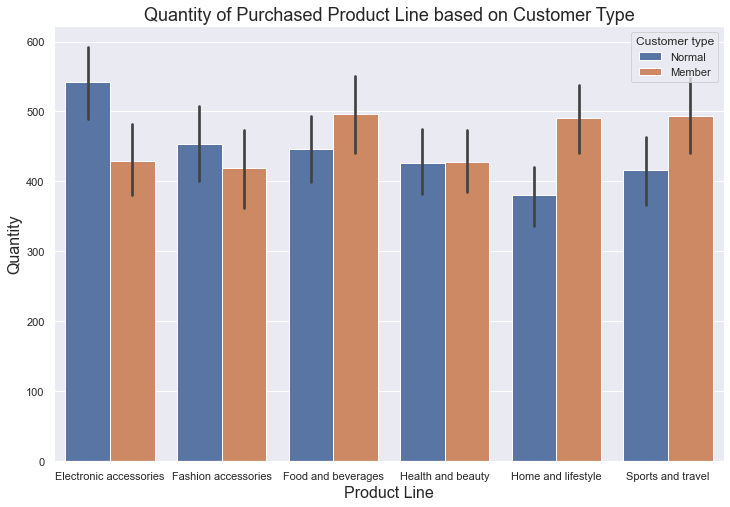

In [291]:
fig1 = plt.figure(figsize=(12,8))
sns.barplot(x='Product line', y='Quantity', data=df_new.sort_values('Product line'), 
            estimator=sum, hue='Customer type')
plt.title('Quantity of Purchased Product Line based on Customer Type', fontsize=18)
plt.xlabel('Product Line', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.show()

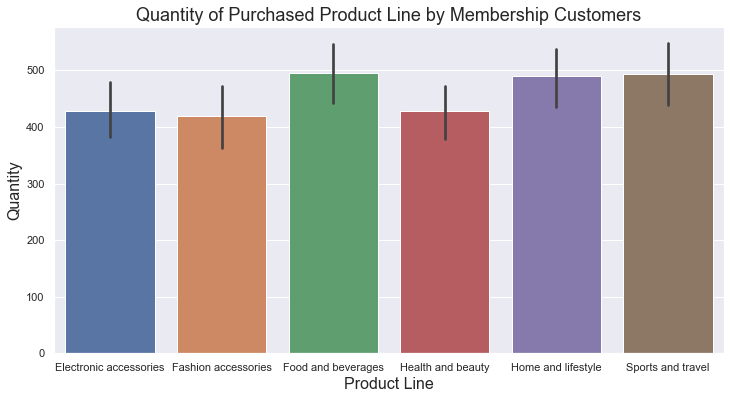

In [292]:
fig1a = plt.figure(figsize=(12,6))
sns.barplot(x='Product line', y='Quantity', data=df_new[df_new['Customer type']=='Member'].sort_values('Product line'), 
            estimator=sum)
plt.title('Quantity of Purchased Product Line by Membership Customers', fontsize=18)
plt.xlabel('Product Line', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.show()

It appears that the membership customers purchased Food and Beverages line the most, and purchased the Fashion Accessories line the least.

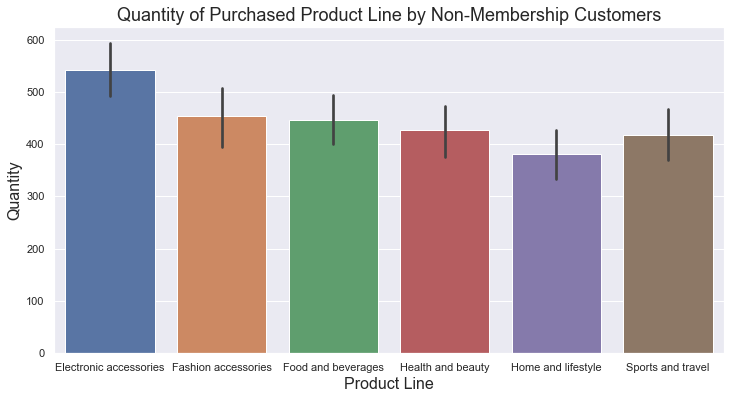

In [293]:
fig1b = plt.figure(figsize=(12,6))
sns.barplot(x='Product line', y='Quantity', data=df_new[df_new['Customer type']=='Normal'].sort_values('Product line'), 
            estimator=sum)
plt.title('Quantity of Purchased Product Line by Non-Membership Customers', fontsize=18)
plt.xlabel('Product Line', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.show()

It appears that the membership customers purchased Electronic Accessories line the most, and purchased the Home and Lifestyle line the least.

From the diagrams above, it appears that Electronic Accessories and Fashion Accessories products are purchased more by normal customers, which are non-membership customers.

On the other hand, it appears that Food and Beverages, Health and Beauty, Home and lifesttyle, and Sports and Travel products are purchased more by membership customer.

#### **Visualization 2**: Gross Income Average of Each Branch

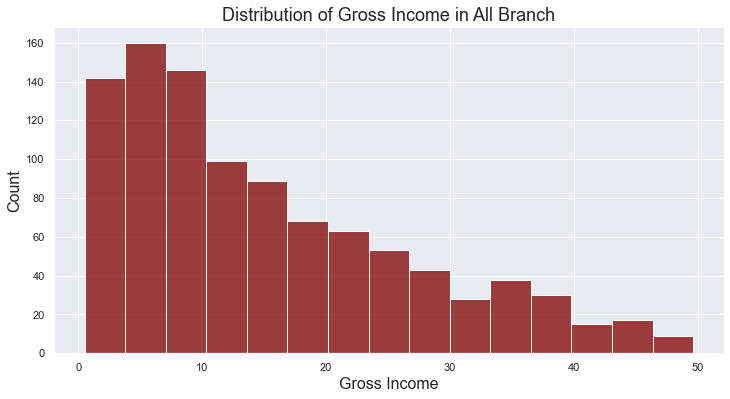

In [294]:
fig2, ax2 = plt.subplots(figsize=[12,6])
sns.histplot(df['gross income'], color="maroon")
plt.title('Distribution of Gross Income in All Branch', fontsize=18)
plt.xlabel('Gross Income', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

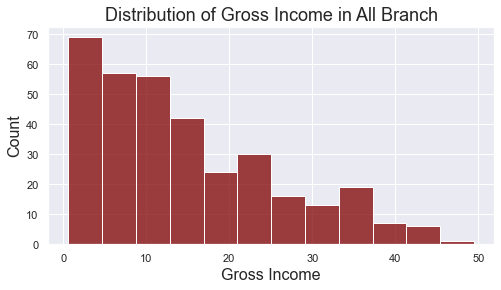

In [295]:
fig2a, ax2a = plt.subplots(figsize=[8,4])
sns.histplot(df[df['City']=='Yangon']['gross income'], color="maroon")
plt.title('Distribution of Gross Income in All Branch', fontsize=18)
plt.xlabel('Gross Income', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

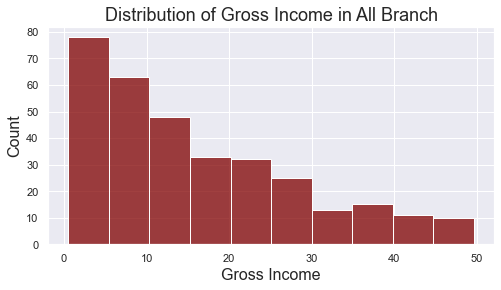

In [296]:
fig2b, ax2b = plt.subplots(figsize=[8,4])
sns.histplot(df[df['City']=='Naypyitaw']['gross income'], color="maroon")
plt.title('Distribution of Gross Income in All Branch', fontsize=18)
plt.xlabel('Gross Income', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

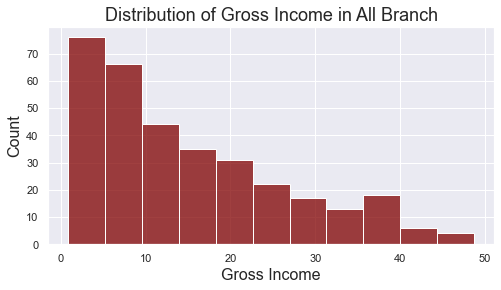

In [297]:
fig2c, ax2c = plt.subplots(figsize=[8,4])
sns.histplot(df[df['City']=='Mandalay']['gross income'], color="maroon")
plt.title('Distribution of Gross Income in All Branch', fontsize=18)
plt.xlabel('Gross Income', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

From the full diagram, it appears that the distribution of gross income data is not normal. THe diagram shows that the distribution is positive skew.

Same thing goes for the segregated diagram. The gross income data in all three branches show a positive skew distribution. It means the mean > median > mode.

#### **Visualization 3**: Product Line Proportion in Percentage

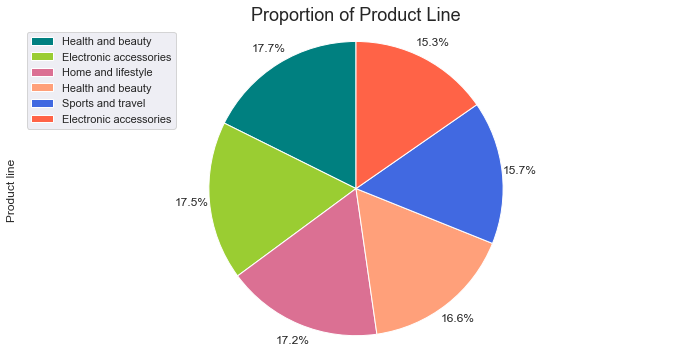

In [298]:
colors_list = ['teal', 'yellowgreen', 'palevioletred', 'lightsalmon', 'royalblue', 'tomato']

fig3,ax3 = plt.subplots()
df_new['Product line'].value_counts().plot(kind='pie', 
                                           figsize=(12,6),
                                           autopct='%1.1f%%', 
                                           startangle=90,
                                           labels=None,         # turn off labels on pie chart
                                           pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                           colors=colors_list,
                                           ax=ax3  
                                           )
fig3.patch.set_facecolor('white')
plt.title('Proportion of Product Line', fontsize=18)
plt.axis('equal')
plt.legend(labels=df_new['Product line'], loc='upper left') 
plt.show()

In [299]:
df_new['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

From the diagram above, we can see that all Product Lines are purchased almost evenly. The most purchased is in Health and Beauty line and the least is in Electronic Accessories line

#### **Visualization 4**: Fluctuation of Gross income in the Supermarket Branches

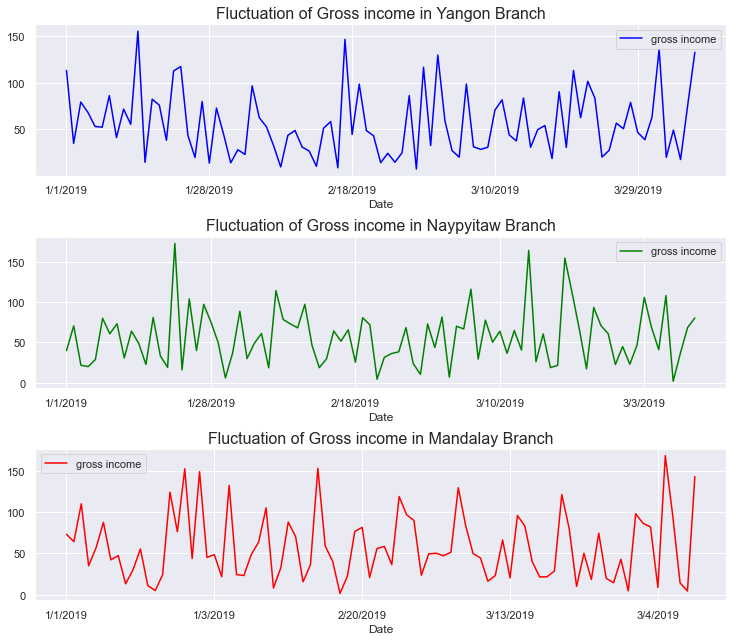

In [300]:
df_yangon = df_new[df_new['City']=='Yangon'][['Date','City','gross income']].groupby('Date').sum().sort_values('Date')
df_naypyitaw = df_new[df_new['City']=='Naypyitaw'][['Date','City','gross income']].groupby('Date').sum().sort_values('Date')
df_mandalay = df_new[df_new['City']=='Mandalay'][['Date','City','gross income']].groupby('Date').sum().sort_values('Date')

fig4 = plt.figure()

ax0 = fig4.add_subplot(3, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig4.add_subplot(3, 1, 2)
ax2 = fig4.add_subplot(3, 1, 3)

df_yangon.plot(kind='line',
               color='blue',
               figsize=(30,20),
               ax=ax0)

df_naypyitaw.plot(kind='line',
                  color='green',
                  figsize=(12,10),
                  ax=ax1)

df_mandalay.plot(kind='line',
                 color='red',
                 figsize=(12,10),
                 ax=ax2)

ax0.set_title('Fluctuation of Gross income in Yangon Branch', fontsize=16) 
ax1.set_title('Fluctuation of Gross income in Naypyitaw Branch', fontsize=16)
ax2.set_title('Fluctuation of Gross income in Mandalay Branch', fontsize=16)   

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



From the graph above, we can see that the gross income is very fluctuative in every branch. Sometimes it reaches below 50, but sometimes it reaches above 150.

---

## **Conclusion and Overall Analysis**

1. Based on the hypothesis testing result, it can be concluded that the morning sales gross income is not significant from the evening sales gross income. The graph also showed that there are not many differences between the morning sales distribution and evening sales distribution. We can conclude that in the morning the Supermarkets have as much gross income as in the evening.

2. THe visualization 1 showed us that the Electronic Accessories line and Fashion Accessories line are purchased more by non-membership customers. On the other hand, Food and Beverages, Health and Beauty, Home and lifesttyle, and Sports and Travel product lines are purchased more by membership customer.

3. The visualization 2 showed us that the distributions of the gross income are positive skew. That means the average of the gross income is bigger than the median, and the median is bigger than the mode.

4. The visualization 4 showed us that all Product Lines are purchased almost evenly. The most purchased is in Health and Beauty line and the least is in Electronic Accessories line

5. The visualization 5 showed us that the gross income were very fluctuative in every branch.